# Random Forest Regression
## Module import

In [5]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Fit default model on different sample windows

In [7]:
# Set the directory containing the CSV files
input_dir = '../../1-preprocessing/data/8-splits/USD'

# Create a DataFrame to store the results
oob_results = pd.DataFrame(columns=['Offset', 'OOB Error'])
r2_results = pd.DataFrame(columns=['Offset', 'R2'])

# Loop through the files in the directory
# for offset in os.listdir(input_dir):  # All
for offset in ['1','10','20','30','40','50']:  # Subset (faster)
    print(offset)
    
    train_data = pd.read_csv(os.path.join(input_dir, offset, "train_data.csv"))
    test_data = pd.read_csv(os.path.join(input_dir, offset, "test_data.csv"))
    
    # Split the data into features and target
    X_train = train_data.iloc[:, 1:-1]
    y_train = train_data.iloc[:, -1]
    X_test = test_data.iloc[:, 1:-1]
    y_test = test_data.iloc[:, -1]

    # Fit the RandomForestRegressor model
    model = RandomForestRegressor(
        n_estimators=100,
        oob_score=True,
        random_state=0
    )
    
    model.fit(X_train, y_train)
    
    # Calculate the OOB error
    oob_error = 1 - model.oob_score_
    
    # Calculate the R-squared score
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Add the results to the DataFrame
    oob_results = pd.concat([oob_results, pd.DataFrame({'Offset': [offset], 'OOB Error': [oob_error]})])
    r2_results = pd.concat([r2_results, pd.DataFrame({'Offset': [offset], 'R2': [r2]})])

1
10
20
30
40
50


## Plot results

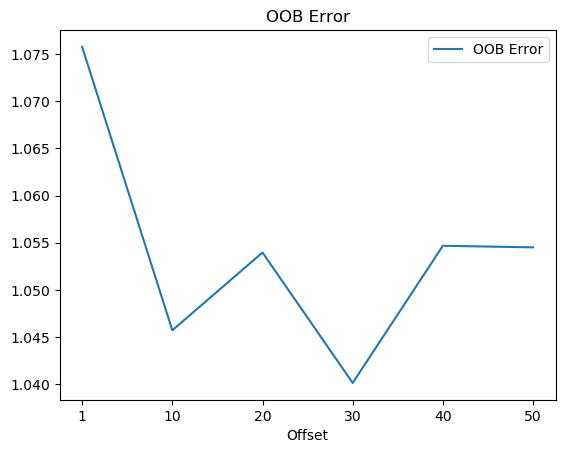

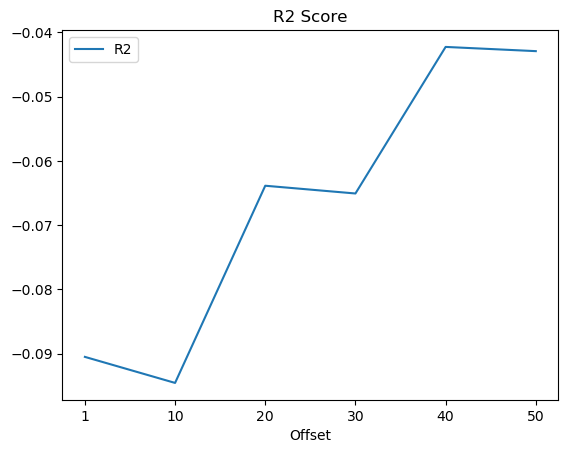

In [8]:
sorted_oob = oob_results.sort_values(by='Offset')
sorted_oob.plot(title='OOB Error', x='Offset', y='OOB Error')

sorted_r2 = r2_results.sort_values(by='Offset')
sorted_r2.plot(title='R2 Score', x='Offset', y='R2')

## Save results to a CSV file

In [4]:
sorted_oob.to_csv('oob_error_results.csv', index=False)
sorted_r2.to_csv('r2_results.csv', index=False)